In [0]:
  """Code for hypothesis testing of the datasets in order to determine the each of the previously tested null hypotheses
  may be proven or disprove. 
  Statistical tests that are carried out are: pvalues, histograms, kernel density estimators, t-tests and linear regressions.
  
  #***************************************************************************************
  #  *    Title: lab7_hypothesis-checkpoint
  #  *    Author: Dr Manal Helal
  #  *    Date: November 2019 
  #  *    Code version: 1.02
  #***************************************************************************************
   """

'Code for hypothesis testing of the datasets in order to determine the each of the previously tested null hypotheses\nmay be proven or disprove. \nStatistical tests that are carried out are: pvalues, histograms, kernel density estimators, t-tests and linear regressions.\n\n#***************************************************************************************\n#  *    Title: lab7_hypothesis-checkpoint\n#  *    Author: Dr Manal Helal\n#  *    Date: November 2019 \n#  *    Code version: 1.02\n#***************************************************************************************\n '

In [0]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy.stats as ss
import csv

#Import the dataset
df = pd.read_csv('ctdRand.csv', engine='python', encoding='utf-8', error_bad_lines=False)


print(len(df))
df.mean()
df.fillna(0)

#Sort the dataset by their value field using quicksort. Smallest values will be first.
df = df.sort_values('TotalAttacksQuart',ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)

print(round(len(df)/2))

#Split the dataset into two, each set being of an equal length.
df1 = df.iloc[:round(len(df)/2)]
df2 = df.iloc[round(len(df)/2):]

#GEt the T-Test statistic value and the p value of the datasets.
print(stats.ttest_ind(df1.dropna()['TotalSamples'], df2.dropna()['TotalSamples']))







850000
425000
Ttest_indResult(statistic=91.26298528412694, pvalue=0.0)


In [0]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt

#Trim the sets to the required fields only.
valsColumn = [currColumn for currColumn in df.columns if "TotalAttacksQuart" in currColumn
    or "TotalSamples" in currColumn]
df = df[df.TotalSamples != 0] 
df = df[df.TotalAttacksQuart != 0] 
#df = df[valsColumn]
#valsColumn = [v for v in valsColumn if "Value" in v]

print ("\n(2) TOTAL SAMPLES IN FILE:")
print("\t\t\t\t%d "%(len(df.index)))

print (valsColumn)

ValueHigherThanzero = [ idx for idx,isRanked in enumerate(df['TotalAttacksQuart']) if isRanked>0 ]
print("\n(3) TOTAL with a value greater than zero:")
print("\t\t\t\t%d "%(len(ValueHigherThanzero)))

#if df['Value'].dtype != 'int':
 #   df['Value'] = df['Value'].astype('int')





(2) TOTAL SAMPLES IN FILE:
				850000 
['TotalSamplesAnnual', 'TotalSamples', 'TotalAttacksQuart']

(3) TOTAL with a value greater than zero:
				850000 


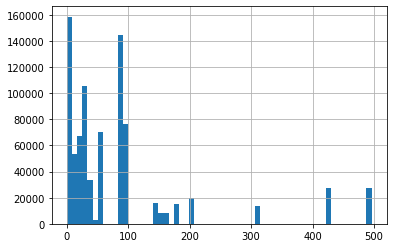

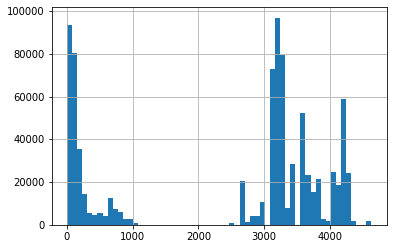

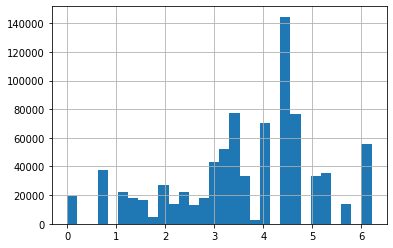

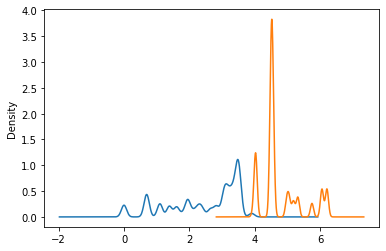

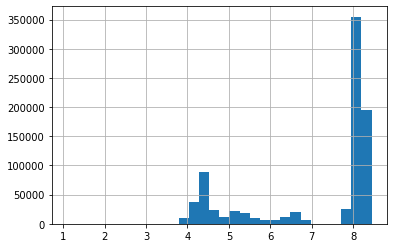

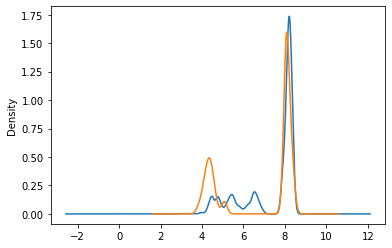

In [0]:

#Generate histograms for both of the fields that are being tested. 
#Generate one with the original values and one with the log values.
png_file = 'histAttacks.png'
hist = df['TotalAttacksQuart'].hist(bins=60)
hist.get_figure().savefig(png_file)
plt.show()

png_file = 'histSamples.png'
hist = df['TotalSamples'].hist(bins=60)
hist.get_figure().savefig(png_file)
plt.show()


png_file = 'histlogAttacks.png'
df['log_Attacks'] = np.log(df['TotalAttacksQuart'])
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
lhist = df['log_Attacks'].hist(bins=30)
lhist.get_figure().savefig(png_file)
plt.show()

df1 = df.iloc[:round(len(df)/2)]
df2 = df.iloc[round(len(df)/2):]

#Generate a KDE for both tested fields.
png_file = 'KDE.png'
df1['log_Attacks'].plot(kind='kde')
kde = df2['log_Attacks'].plot(kind='kde')
kde.get_figure().savefig(png_file)
plt.show()


png_file = 'histlogSamples.png'
df['log_Sample'] = np.log(df['TotalSamples'])
lhist = df['log_Sample'].hist(bins=30)
lhist.get_figure().savefig(png_file)
plt.show()

df1 = df.iloc[:round(len(df)/2)]
df2 = df.iloc[round(len(df)/2):]

png_file = 'KDE2.png'
df1['log_Sample'].plot(kind='kde')
kde = df2['log_Sample'].plot(kind='kde')
kde.get_figure().savefig(png_file)
plt.show()



In [0]:
def probGivenPop (RPOP_data, NRPOP_data, log_pop):
    """ model each variable as a normal CRV. 
       This function will find the conditional probability of the two variables: P(value | sample)
       P(RPOP = sample) = 0 and P(RPOP = sample) = 0, since they are CRVs. An interval can be added in order to 
       get non-zero values.
       Look at the ratio of P(sample -.5 < RPOP < sample + .5) to P(sample -.5 < NRPOP < sample + .5)
       and normalize by the total count of each."""
    
    #compute the probabilities under each population 
    bw = .5 #bandwidth for estimates
    P_RPOP = ss.norm.cdf(log_pop+bw, RPOP_data.mean(), RPOP_data.std()) - \
        ss.norm.cdf(log_pop-bw, RPOP_data.mean(), RPOP_data.std())#probability among ranked
    P_NRPOP = ss.norm.cdf(log_pop+bw, NRPOP_data.mean(), NRPOP_data.std()) - \
        ss.norm.cdf(log_pop-bw, NRPOP_data.mean(), NRPOP_data.std())#probability among not ranked
    
    #Normalize by population of each to get an estimated number of samples with each value:
    Est_Counties_Ranked_at_pop = P_RPOP * len(RPOP_data)
    Est_Counties_NotRanked_at_pop = P_NRPOP * len(NRPOP_data)
    
    #Compute the probability: value / all values (in the given population)
    return Est_Counties_Ranked_at_pop / (Est_Counties_Ranked_at_pop + Est_Counties_NotRanked_at_pop)


print ("\t 55000: %.4f" % probGivenPop(df1['log_Attacks'], df2['log_Attacks'], np.log(55000)))
print ("\t 55000: %.4f" % probGivenPop(df1['log_Sample'], df2['log_Sample'], np.log(55000)))


	 55000: 1.0000
	 55000: 0.3378


In [0]:
print ("\n LIST MEAN AND STD_DEC PER COLUMN:")
mean_sd = df[valsColumn].describe()[1:3] ## returns mean and std only, other describe output is ignored
mean_sd_dict = dict([(c, (round(mean_sd[c]['mean'], 4), round(mean_sd[c]['std'], 4), )) for c in mean_sd.columns])
from pprint import pprint
pprint(mean_sd_dict)


 LIST MEAN AND STD_DEC PER COLUMN:
{'TotalAttacksQuart': (86.1067, 114.9759),
 'TotalSamples': (2442.2311, 1594.0426),
 'TotalSamplesAnnual': (9923.2738, 6348.3867)}


850000


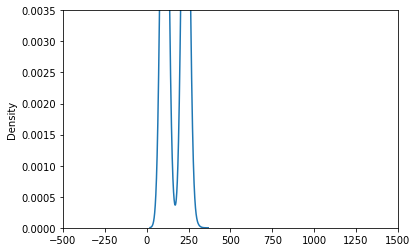

In [0]:
#sort values by sample
df.sort_values(by=['TotalSamples'])

print(len(df))
index = int(0.5 * len(df.index))
lowHalf, highHalf = df[:index], df[index:]

#Split the dataset into two
lowHalfSAMPLES = df1['TotalSamples'][~df1['TotalSamples'].isnull()][:100] #or .dropna()
highHalfSAMPLES = df2['TotalSamples'][~df2['TotalSamples'].isnull()][:100]


dataSAMPLES = pd.concat([lowHalfSAMPLES, highHalfSAMPLES])

#Generate a kde:
dataSAMPLES.plot(kind='kde')
#highHalfSAMPLES.plot(kind='kde')

plt.axis([-500,1500,0,0.0035]) #zoom in to these dimensions
plt.show()

In [0]:

#Calculate the means, standard deviations, length of each subset.

mean1, mean2 = lowHalfSAMPLES.mean(), highHalfSAMPLES.mean()
sd1, sd2 = lowHalfSAMPLES.std(), highHalfSAMPLES.std() #standard deviation across both
n1, n2 = len(lowHalfSAMPLES), len(highHalfSAMPLES)
df1, df2 = (n1 - 1), (n2 - 1)
print ("Mean of lower 50%%: %.1f (%d) \nMean of upper 50%%: %.1f (%d) \n " % (mean1, n1, mean2, n2))

##two sample t-test, assuming equal variance:
pooled_var = (df1*sd1**2 + df2*sd2**2) / (df1 + df2) #pooled variance
t = (mean1 - mean2) / np.sqrt(pooled_var * (1.0/n1 + 1.0/n2)) 
print (t)
p = 1 - ss.t.cdf(np.abs(t), df1+df2)
print ("t: %.4f, df: %.1f, p: %.5f" % (t, df1+df2, p)) #one tail (if you hypothesize)
print ('t-statistic = %6.3f pvalue = %6.4f' %  ss.ttest_ind(lowHalfSAMPLES, highHalfSAMPLES)) #two tails

Mean of lower 50%: 232.5 (100) 
Mean of upper 50%: 107.0 (100) 
 
136.1834342236363
t: 136.1834, df: 198.0, p: 0.00000
t-statistic = 136.183 pvalue = 0.0000


yhat = beta0 + beta1*x = 2885.89 + -122.51x


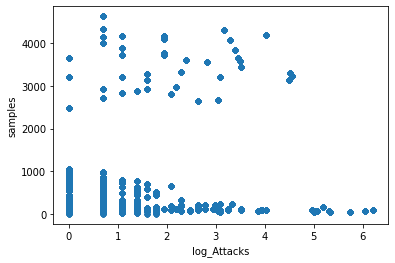

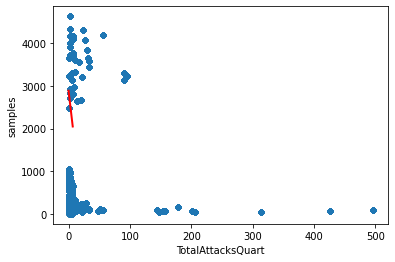

In [0]:


#Use original data
data = df[~df['TotalSamples'].isnull()]#drop nas
data = data[data['TotalSamples']!=0]#drop zeros
data['samples']= data['TotalSamples']

#Create a scatter plot of the data.
data.dropna(subset = ['TotalAttacksQuart'], inplace=True)
data.dropna(subset = ['log_Attacks'], inplace=True)
data.plot(kind='scatter', x = 'log_Attacks', y='samples', alpha=0.3)

#Generate a nonlogged scatter
data.plot(kind='scatter', x = 'TotalAttacksQuart', y='samples', alpha=0.3)

##Have scipy figure out the regression coefficients:
beta1, beta0, r, p, stderr = ss.linregress(data['log_Attacks'], data['samples'])# we will talk about r, p, and stderr next
#(assume beta1 and beta0 are estimate; i.e. beta1hat, beta0hat; we will almost never know non-estimated betas)
print ("yhat = beta0 + beta1*x = %.2f + %.2fx" % (beta0, beta1))
#plot the line:
xpoints = np.linspace(data['log_Attacks'].min()*.90, data['log_Attacks'].max()*1.1, 100)
plt.plot(xpoints, beta0 + beta1*xpoints, color='red', linewidth=2) # "beta0 + beta1*xpoints" is using vector algebra

before logging SAMPLES; r = -0.113, p = 0.00000


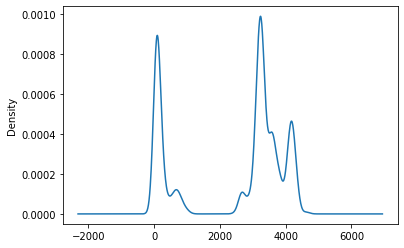

after logging SAMPLES; r = -0.236, p = 0.00000


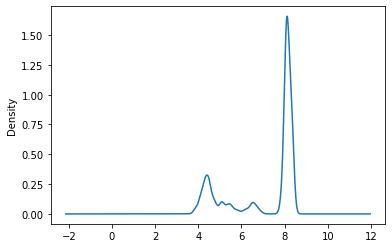

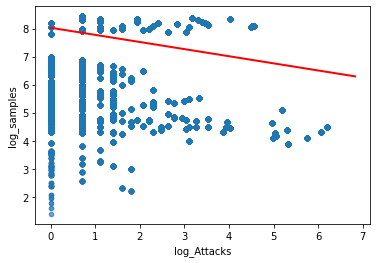

from linregress: r = -0.236, p = 0.00000


In [0]:
#Generate KDEs and final linear regression.
data['samples'].plot(kind='kde') 
#print(data['samples'])
data.dropna(subset = ['samples'], inplace=True)
data.dropna(subset = ['log_Attacks'], inplace=True)
#print(data['samples'])
print ("before logging SAMPLES; r = %.3f, p = %.5f" % ss.pearsonr(data['log_Attacks'], data['samples']))
plt.show()
data['log_samples'] = np.log(data['samples']+1)
data['log_samples'].plot(kind='kde')#after transform
print ("after logging SAMPLES; r = %.3f, p = %.5f" % ss.pearsonr(data['log_Attacks'], data['log_samples']))

data.plot(kind='scatter', x = 'log_Attacks', y='log_samples', alpha=0.3)
beta1, beta0, r, p, stderr = ss.linregress(data['log_Attacks'], data['log_samples'])# we will talk about r, p, and stderr next
xpoints = np.linspace(data['log_Attacks'].min()*.90, data['log_Attacks'].max()*1.1, 100)
plt.plot(xpoints, beta0 + beta1*xpoints, color='red', linewidth=2) #note: "beta0 + beta1*xpoints" is using vector algebra
plt.show()
print ("from linregress: r = %.3f, p = %.5f" % (r, p))

#The red line has a steeper slope now => greater r


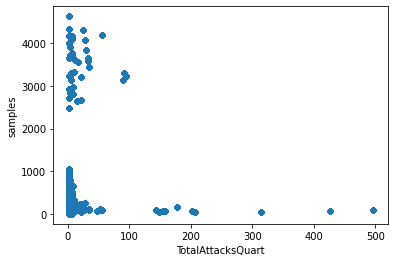

In [0]:






data.plot(kind='scatter', x = 'TotalAttacksQuart', y='samples', alpha=0.3)
